# Árvores II - classificação binomial

Vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

- Faça o download dos arquivos:
    
Ela está disponível neste link: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/

dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names

UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

- Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
- Carregue a base subject_train.txt em uma *Series*
- Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```


In [2]:
features = pd.read_csv(r'.\UCI HAR Dataset\features.txt',sep='^',header=None)
subject_train = pd.read_csv(r'.\UCI HAR Dataset\train\subject_train.txt',header=None)
X_train = pd.read_csv(r'.\UCI HAR Dataset\train\X_train.txt', header=None, sep=' ', skipinitialspace=True)
y_train = pd.read_csv(r'.\UCI HAR Dataset\train\y_train.txt', header=None, sep=' ', skipinitialspace=True)


print(features.shape)
print(subject_train.shape)
print(X_train.shape)

(561, 1)
(7352, 1)
(7352, 561)


In [3]:
colunas = []

for i in range(0,features.shape[0]):
    colunas.append(features[0][i])
    
X_train.columns = colunas
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***


In [4]:
X_train['individuo'] = subject_train
X_train.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",individuo
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo

In [5]:
X_train.reset_index(inplace = True)
X_train.set_index(['index','individuo'],inplace=True,drop=True)
X_train.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
index,individuo,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892



5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro


In [6]:
features = pd.read_csv(r'.\UCI HAR Dataset\features.txt',sep='-',header=None)
subject_test = pd.read_csv(r'.\UCI HAR Dataset\test\subject_test.txt',header=None)
X_test = pd.read_csv(r'.\UCI HAR Dataset\test\X_test.txt', header=None, sep=' ', skipinitialspace=True)
y_test =pd.read_csv(r'.\UCI HAR Dataset\test\y_test.txt', header=None, sep=' ', skipinitialspace=True)

X_test.columns = colunas
X_test['individuo'] = subject_test
X_test.reset_index(inplace = True)
X_test.set_index(['index','individuo'],inplace=True,drop=True)
X_test.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
index,individuo,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo


In [7]:
X_train.to_csv('X_train_novo.csv')
y_train.to_csv('y_train_novo.csv')

X_test.to_csv('X_test_novo.csv')
y_test.to_csv('y_test_novo.csv')

7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [8]:
x0_train= X_train.iloc[:,[0,1,2,3,4,5]]
y0_train = y_train.copy()
x0_train.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z
index,individuo,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526


In [9]:
x0_test= X_test.iloc[:,[0,1,2,3,4,5]]
y0_test = y_test.copy()
x0_test.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z
index,individuo,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683


### 2. Ajustar uma árvore de decisão
Ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior. Calcule os ccp_alphas e faça uma árvore para cada um deles. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ccp_alphas, considerando apenas 1 a cada 5 valores


In [10]:
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20).fit(x0_train, y0_train)

In [11]:
caminho = clf.cost_complexity_pruning_path(x0_train, y0_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [12]:
clfs = []
alfas = ccp_alphas[0:ccp_alphas.shape[0]:5]  # Reduzindo ccp_alphas para 1 a cada 5 valores
for ccp_alpha in alfas:
    clf1 = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(x0_train, y0_train)
    clfs.append(clf1)

### 3. Desempenho da árvore por ccp_alpha

3.1: Calcule a acurácia de cada árvore na base de treinamento e de teste

3.2: Monte um gráfico da acurácia em função do ccp_alpha na base de validação e na base de teste

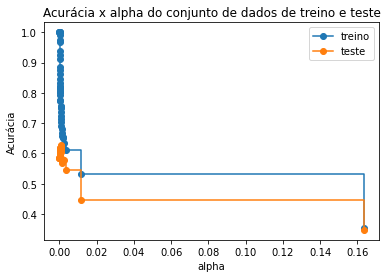

In [13]:
train_scores = [clf.score(x0_train, y0_train) for clf in clfs]
test_scores = [clf.score(x0_test, y0_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(alfas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(alfas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

3.3: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste

In [14]:
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
print(f'A melhor acurácia obtida com estas 6 variáveis é de {melhor_arvore}')

A melhor acurácia obtida com estas 6 variáveis é de DecisionTreeClassifier(ccp_alpha=0.0007237804775698069, random_state=42)


3.5: Qual a melhor acurácia que se pode obter com estas seis variáveis?


C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


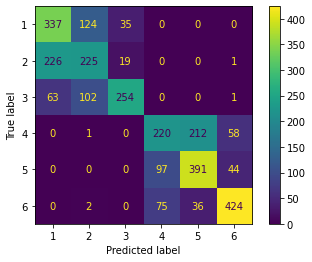

In [15]:
plot_confusion_matrix(melhor_arvore, x0_test, y0_test)

### Repetindo processo para 12 variáveis

In [16]:
x1_train= X_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y1_train = y_train.copy()

x1_test= X_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y1_test = y_test.copy()

In [22]:
clf12 = DecisionTreeClassifier(random_state=42, min_samples_leaf=20).fit(x1_train, y1_train)
caminho12 = clf12.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas12, impurities12 = caminho12.ccp_alphas, caminho12.impurities

clfs12 = []
alfas = ccp_alphas12[0:ccp_alphas12.shape[0]:5]  # Reduzindo ccp_alphas para 1 a cada 5 valores

for ccp_alpha in alfas:
    clf_12 = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(x1_train, y1_train)
    clfs12.append(clf_12)

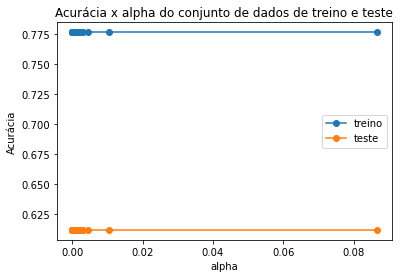

In [23]:
train_scores12 = [clf12.score(x1_train, y1_train) for clf in clfs12]
test_scores12 = [clf12.score(x1_test, y1_test) for clf in clfs12]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(alfas, train_scores12, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(alfas, test_scores12, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
ind_melhor_arvore12 = len(test_scores12) - test_scores12[::-1].index(max(test_scores12)) - 1
melhor_arvore12 = clfs12[ind_melhor_arvore12]
print(f'A melhor acurácia obtida com estas 12 variáveis é de {melhor_arvore12}')

A melhor acurácia obtida com estas 12 variáveis é de DecisionTreeClassifier(ccp_alpha=0.08653762962195494, random_state=42)


C:\Users\Artur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


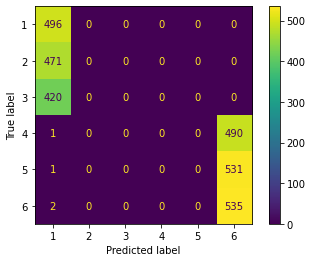

In [25]:
plot_confusion_matrix(melhor_arvore12, x1_test, y1_test)

Aparentemente, tivemos um resultado melhor com 12 variáveis.